# Final project: Digit recognization

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

### Preprocess Data

In [5]:
# Load the data.
data = pd.read_csv('./data/train.csv')
label = data['label']
data.drop('label', axis = 1, inplace = True)

In [6]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

Split the data & check the size:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve

In [9]:
x_tr, x_te, y_tr, y_te = train_test_split(data, label, test_size = 0.2, random_state = 1)

In [10]:
x_tr.shape, x_te.shape, y_tr.shape, y_te.shape

((33600, 784), (8400, 784), (33600,), (8400,))

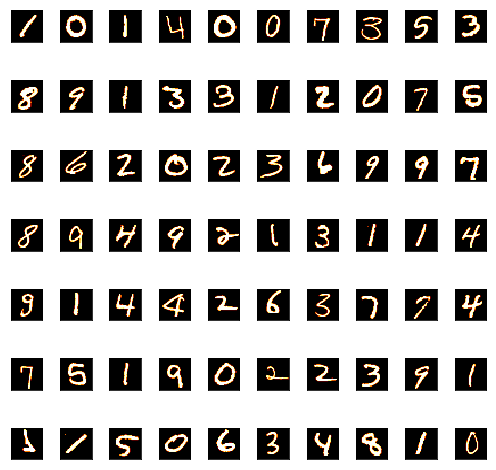

In [7]:
def showPic(data):
    plt.figure(figsize=(7,7))
    # Show the first 70 images in training data.7
    for digit_num in range(0,70):
        plt.subplot(7,10,digit_num+1)
        grid_data = data.iloc[digit_num,:].values.reshape(28,28)  # reshape from 1d to 2d pixel array
        plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    return(None)
showPic(data)
plt.savefig('digits')

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
# for convenience, define a function to calculate the test & training accuracy.
def pred_accu(pred_tr, pred_te):
    '''
    This is a function to calculate the test & training accuracy.
    
    Input:
    pred_tr:prediction for training data.
    pred_te:predcition for test data.
    
    Output:
    A string demonstrate the accuracies.
    '''
    n_tr = 33600
    n_te = 8400
    te_accu = sum(pred_te == y_te)/n_te
    tr_accu = sum(pred_tr == y_tr)/n_tr
    print('The training accuracy is {}. \nThe test accuracy is {}'.format(tr_accu, te_accu))
    return(None)

In [13]:
def model_test(x, y_true, clf, name = None):
    '''
    This function is doing cross-validation on given data and model.
    
    Input:
    x: variable matrix(dataframe)
    y_true: True label of each data point
    clf: The classifier to validate
    name: Name of the classifier
    '''
    start_time = time.time()
    score = cross_val_score(clf, x, y_true, cv = 5, scoring = 'accuracy' ).mean()
    end_time = time.time()
    print('Model: {}'.format(name))
    print('Running time: {}'.format(end_time - start_time))
    print('Accuracy: {}'.format(score))
    return(None)

### Gaussian Naiive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [46]:
gnb = GaussianNB()
gnb.fit(x_tr, y_tr)
gnb_pred_te = gnb.predict(x_te)
gnb_pred_tr = gnb.predict(x_tr)

In [47]:
model_test(x_te, y_te, gnb, 'GaussianNB')

Model: GaussianNB
Running time: 1.8853528499603271
Accuracy: 0.5977254989416543


From the accuracy for data sets, the accuracy is obviously bad. It is only 0.55661 even on training data. The result is not so ideal. Therefore, trying to find out if the reason is the posterior, I changed the distribution to multinomial.

### Multinomial Naiive Bayes

In [48]:
mnb = MultinomialNB()
mnb.fit(x_tr, y_tr)
model_test(x_te, y_te, gnb, 'Multinomial Naiive Bayes')

Model: Multinomial Naiive Bayes
Running time: 1.8795948028564453
Accuracy: 0.5977254989416543


After changing into Mutinomial naiive bayes, things did not really change. The accuracy stayed the same, just the time consumed was slightly less. So, it is obvious that naiive bayes is not suitable for this situation.

### Decision tree:

In [12]:
from sklearn import tree

In [13]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(x_tr, y_tr)
tree_pred_te = tree_clf.predict(x_te)
tree_pred_tr = tree_clf.predict(x_tr)

In [14]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/graphviz/bin/'
dot_data = tree.export_graphviz(tree_clf)
graph = graphviz.Source(dot_data)
graph.render('digit')

'digit.pdf'

In [57]:
model_test(x_te, y_te, tree_clf, 'Decision tree')

Model: Decision tree
Running time: 5.37388277053833
Accuracy: 0.791057324556544


In [58]:
pred_accu(tree_pred_tr, tree_pred_te)

The training accuracy is 1.0. 
The test accuracy is 0.8558333333333333


I found that decision tree model overfit the training data and got the accuracy as 1.0. But the accuracy for the test data was just 0.86. So instead of traditional decision tree, I gave a try on random forest.

### Random forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf_clf = RandomForestClassifier(n_estimators=400, n_jobs=4)
rf_clf.fit(x_tr, y_tr)
model_test(x_te, y_te, rf_clf, 'Random Forest')

Model: Random Forest
Running time: 24.555639028549194
Accuracy: 0.9446425454686327


From the result of model_test, random forest got an impressive accuracy on test data. However I still wanted to improve the running time, since there were 2 tunning parameters to work further on: n_estimators and n_jobs. Hopefully, by changing tunning parameters and checking the score in each iteration, running time will converge before setting the estimators to be 400.

In [61]:
scores = []
times = []

for n_est in range(15,420, 15):
    print('--------n_est = {}---------'.format(n_est))
    start = time.time()
    rf_temp = RandomForestClassifier(n_estimators= n_est, n_jobs=4)
    rf_temp.fit(x_tr, y_tr)
    s = cross_val_score(rf_temp, x_te, y_te, cv = 5, scoring = 'accuracy' ).mean() 
    scores.append(s)
    end = time.time()
    t = end - start
#     print(t)
    times.append(t)


--------n_est = 15---------
--------n_est = 30---------
--------n_est = 45---------
--------n_est = 60---------
--------n_est = 75---------
--------n_est = 90---------
--------n_est = 105---------
--------n_est = 120---------
--------n_est = 135---------
--------n_est = 150---------
--------n_est = 165---------
--------n_est = 180---------
--------n_est = 195---------
--------n_est = 210---------
--------n_est = 225---------
--------n_est = 240---------
--------n_est = 255---------
--------n_est = 270---------
--------n_est = 285---------
--------n_est = 300---------
--------n_est = 315---------
--------n_est = 330---------
--------n_est = 345---------
--------n_est = 360---------
--------n_est = 375---------
--------n_est = 390---------
--------n_est = 405---------


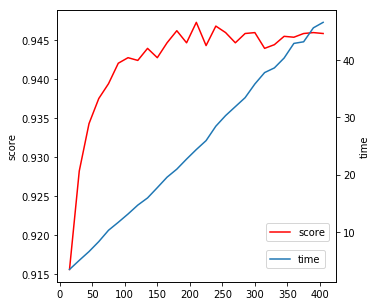

In [62]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(list(range(15,420, 15)), scores, label = 'score', c = 'red')
ax1.set_ylabel('score')
ax1.legend(loc = (0.75,0.15))

ax2 = ax1.twinx()
ax2.plot(list(range(15,420,15)), times, label = 'time')
ax2.set_ylabel('time')
ax2.legend(loc = (.75,.05))

plt.savefig('random_forest')

From the plot we can see that the accuracy converged to around 0.945 after n_estimators being larger than 115. Adding more estimators did not result in better estimation but longer time was taken. So it is quite resonable to use the model whose n_estimators is 115. Based on this conclusion, I got the final random forest model as below.

In [63]:
rf_clf = RandomForestClassifier(n_estimators=115, n_jobs=4)
rf_clf.fit(x_tr, y_tr)
model_test(x_te, y_te, rf_clf, 'Random Forest')

Model: Random Forest
Running time: 7.49285101890564
Accuracy: 0.9438126843241047


### PCA and Support vector machine

In [14]:
from sklearn import svm
from sklearn.decomposition import PCA

Since the dimension for each data point is 784, which is considerably large to use in SVM. So it is neccessary to find a way to reduce the dinmension of this problem. The very pratical and fundamental method is to use PCA.

In [15]:
pca_dcp = PCA()
pca_dcp.fit(x_tr)
ratio = pca_dcp.explained_variance_ratio_

cumulative_ratio = 0
n_compo = 0
ratio_sum = []
indicator = 0
for r in ratio:
    cumulative_ratio = cumulative_ratio + r
    ratio_sum.append(cumulative_ratio)
    n_compo = n_compo + 1
    
    if cumulative_ratio >= 0.85 and indicator == 0:
        print('The recommended number of components is {}.\n The cumulative explained variance ratio is {}'.format(n_compo, cumulative_ratio))
        indicator += 1

The recommended number of components is 59.
 The cumulative explained variance ratio is 0.850766248469864


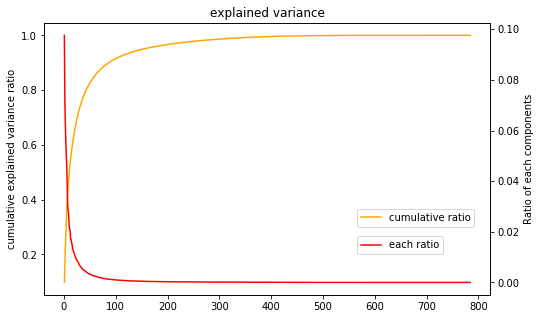

In [16]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)
ax1.plot(list(range(1, len(ratio)+1)), ratio_sum, c = 'orange', label = 'cumulative ratio')
ax1.set_ylabel('cumulative explained variance ratio')
ax1.legend(loc = (0.7,0.25))

ax2 = ax1.twinx()
ax2.plot(list(range(1, len(ratio)+1)), ratio, c = 'r', label = 'each ratio')
ax2.set_ylabel('Ratio of each components')
ax2.legend(loc = (0.7,0.15))

plt.title('explained variance')
plt.savefig('PCA')

Based on the output above, I decided the number of components tobe 87. Then I transformed the data.

In [17]:
pca_dcp = PCA(n_components=59, whiten= True)
x_tr_pca = pca_dcp.fit_transform(x_tr)
x_te_pca = pca_dcp.transform(x_te)

In [18]:
x_tr_pca.shape, x_te_pca.shape

((33600, 59), (8400, 59))

In [19]:
def svm_score():
    start_time = time.time()
    svc_clf = svm.SVC(C = 10, kernel='rbf', gamma = 'auto')
    svc_clf.fit(x_tr_pca, y_tr)
    score = cross_val_score(svc_clf, x_te_pca, y_te, cv=5,scoring='accuracy').mean()
    end_time = time.time()
    print('Use time: {} seconds'.format((end_time - start_time)))
    print('Accuracy on test data: {}'.format(score))
    return(None)

In [20]:
svc_clf = svm.SVC(C = 10, kernel='rbf', gamma = 'auto')
svc_clf.fit(x_tr_pca, y_tr)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
model_test(x_te_pca, y_te, svc_clf, 'SVC')

Model: SVC
Running time: 22.626350164413452
Accuracy: 0.9625042564683233


From the result above, it is clear to see that the running time for either fitting the model or doing cross-validation on the model was improved a lot. And the accuracy still seemed quite good. So the idea using PCA worked well for this data. And so far, I got the best result by SVM('rbf') + PCA.

### KNN

Since there are too much training data and the dimension is quite large, it is predictable that using a KNN model is not ideal. So, even though KNN is designed to do supervied classification, I decided not to use it.

### CNN

In [15]:
import tensorflow as tf
import keras
from keras import layers, datasets, models
from keras import backend as K

Using TensorFlow backend.


In [16]:
import winsound

In [17]:
x_tr.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Transform data

In [18]:
def transform_data():
    img_cols = 28
    img_rows = 28
    num_classes = 10
     
    if K.image_data_format() == 'channels_first':
        x_train = x_tr.values.reshape(x_tr.shape[0], 1, img_rows, img_cols)
        x_test = x_te.values.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, 28, 28)
    else:
        x_train = x_tr.values.reshape(x_tr.shape[0], img_rows, img_cols, 1)
        x_test = x_te.values.reshape(x_te.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
        
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    y_train = keras.utils.to_categorical(y_tr, num_classes)
    y_test = keras.utils.to_categorical(y_te, num_classes)
    
    return x_train, y_train, x_test, y_test

#### Build up model:

In [19]:
def cnn_model():
    model = keras.models.Sequential()
    
    model.add(
        layers.Conv2D(
            filters=32,
            kernel_size=(5, 5),
            padding='Same',
            activation='relu',
            input_shape=(28, 28, 1)))
    
    model.add(
        layers.Conv2D(
            filters=32, 
            kernel_size=(5, 5),
            padding='Same',
            activation='relu'))
    
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    
    model.add(layers.Dropout(0.25))

    model.add(
        layers.Conv2D(
            filters=64, 
            kernel_size=(3, 3), 
            padding='Same', 
            activation='relu'))
    
    model.add(
        layers.Conv2D(
            filters=64, 
            kernel_size=(3, 3), 
            padding='Same', 
            activation='relu'))
    
    model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(256, activation="relu"))
    
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(10, activation="softmax"))
    
    return(model)

In [20]:
x_train, y_train, x_test, y_test = transform_data()
model = cnn_model()

x_train shape: (33600, 28, 28, 1)
33600 train samples
8400 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=False)

In [22]:
for l in model.layers:
    print("{} : {} to {}".format(l.name,l.input_shape,l.output_shape))

conv2d_1 : (None, 28, 28, 1) to (None, 28, 28, 32)
conv2d_2 : (None, 28, 28, 32) to (None, 28, 28, 32)
max_pooling2d_1 : (None, 28, 28, 32) to (None, 14, 14, 32)
dropout_1 : (None, 14, 14, 32) to (None, 14, 14, 32)
conv2d_3 : (None, 14, 14, 32) to (None, 14, 14, 64)
conv2d_4 : (None, 14, 14, 64) to (None, 14, 14, 64)
max_pooling2d_2 : (None, 14, 14, 64) to (None, 7, 7, 64)
dropout_2 : (None, 7, 7, 64) to (None, 7, 7, 64)
flatten_1 : (None, 7, 7, 64) to (None, 3136)
dense_1 : (None, 3136) to (None, 256)
dropout_3 : (None, 256) to (None, 256)
dense_2 : (None, 256) to (None, 10)


#### Training model with different optimizer and batchsize

In [23]:
def run_cnn(batch, opt):
    model = cnn_model()
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt(),
              metrics=['accuracy'])

    history = model.fit(x_train, y_train,
              batch_size= batch,
              epochs=4,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    winsound.Beep(4000, 4000)
    return(history)

-----------------------------
Optimizer: AdaDelta

Batchsize: 32

In [25]:
hist1 = run_cnn(32, keras.optimizers.Adadelta)

Instructions for updating:
Use tf.cast instead.
Train on 33600 samples, validate on 8400 samples
Epoch 1/4
33600/33600 [==============================] - 111s 3ms/step - loss: 0.2236 - acc: 0.9298 - val_loss: 0.0627 - val_acc: 0.9815
Epoch 2/4
33600/33600 [==============================] - 112s 3ms/step - loss: 0.0738 - acc: 0.9786 - val_loss: 0.0516 - val_acc: 0.9860
Epoch 3/4
33600/33600 [==============================] - 112s 3ms/step - loss: 0.0539 - acc: 0.9841 - val_loss: 0.0567 - val_acc: 0.9831
Epoch 4/4
33600/33600 [==============================] - 113s 3ms/step - loss: 0.0442 - acc: 0.9867 - val_loss: 0.0374 - val_acc: 0.9900
Test loss: 0.03740757554355133
Test accuracy: 0.99


-------------------------------------
optimizer: AdaDelta

batchsize: 128

In [27]:
hist2 = run_cnn(128, keras.optimizers.Adadelta)

Train on 33600 samples, validate on 8400 samples
Epoch 1/4
33600/33600 [==============================] - 86s 3ms/step - loss: 0.3677 - acc: 0.8805 - val_loss: 0.0753 - val_acc: 0.9774
Epoch 2/4
33600/33600 [==============================] - 86s 3ms/step - loss: 0.0958 - acc: 0.9705 - val_loss: 0.0561 - val_acc: 0.9829
Epoch 3/4
33600/33600 [==============================] - 86s 3ms/step - loss: 0.0699 - acc: 0.9787 - val_loss: 0.0454 - val_acc: 0.9857
Epoch 4/4
33600/33600 [==============================] - 86s 3ms/step - loss: 0.0558 - acc: 0.9830 - val_loss: 0.0396 - val_acc: 0.9893
Test loss: 0.039592770350337515
Test accuracy: 0.9892857142857143


------------------------------------------------
optimizer: Adam

batchsize: 64

In [28]:
hist3 = run_cnn(64, keras.optimizers.Adam)

Train on 33600 samples, validate on 8400 samples
Epoch 1/4
33600/33600 [==============================] - 105s 3ms/step - loss: 0.2603 - acc: 0.9167 - val_loss: 0.0667 - val_acc: 0.9794
Epoch 2/4
33600/33600 [==============================] - 105s 3ms/step - loss: 0.0871 - acc: 0.9746 - val_loss: 0.0457 - val_acc: 0.9869
Epoch 3/4
33600/33600 [==============================] - 106s 3ms/step - loss: 0.0602 - acc: 0.9811 - val_loss: 0.0419 - val_acc: 0.9886
Epoch 4/4
33600/33600 [==============================] - 106s 3ms/step - loss: 0.0518 - acc: 0.9843 - val_loss: 0.0389 - val_acc: 0.9888
Test loss: 0.03890653940704873
Test accuracy: 0.9888095238095238


In [29]:
hist4 = run_cnn(128, keras.optimizers.Adam)

Train on 33600 samples, validate on 8400 samples
Epoch 1/4
33600/33600 [==============================] - 87s 3ms/step - loss: 0.3032 - acc: 0.9035 - val_loss: 0.0730 - val_acc: 0.9781
Epoch 2/4
33600/33600 [==============================] - 86s 3ms/step - loss: 0.0896 - acc: 0.9721 - val_loss: 0.0495 - val_acc: 0.9846
Epoch 3/4
33600/33600 [==============================] - 86s 3ms/step - loss: 0.0620 - acc: 0.9813 - val_loss: 0.0407 - val_acc: 0.9880
Epoch 4/4
33600/33600 [==============================] - 86s 3ms/step - loss: 0.0510 - acc: 0.9840 - val_loss: 0.0382 - val_acc: 0.9901
Test loss: 0.03818897176650353
Test accuracy: 0.9901190476190476


#### Visualize history

In [114]:
def visual_hist(history, o, b):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 4))
    
    
    ax1.plot(history.history['acc'])
    ax1.plot(history.history['val_acc'])
    ax1.set_title('Model accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Test'], loc='upper left')
#     plt.show()

    # 绘制训练 & 验证的损失值
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Test'], loc='upper right')
#     plt.show()
    
    fig.suptitle('Optimizer: {} + batchsize: {}'.format(o,b))
    
    return()

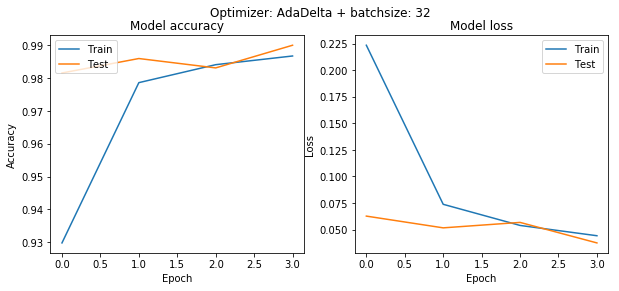

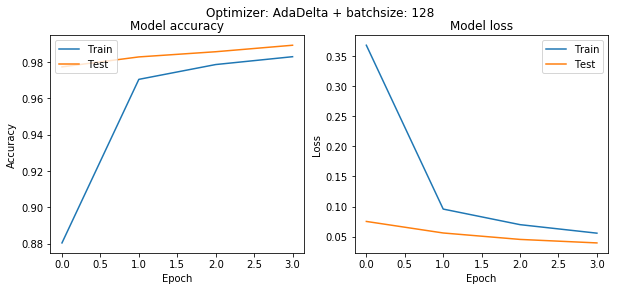

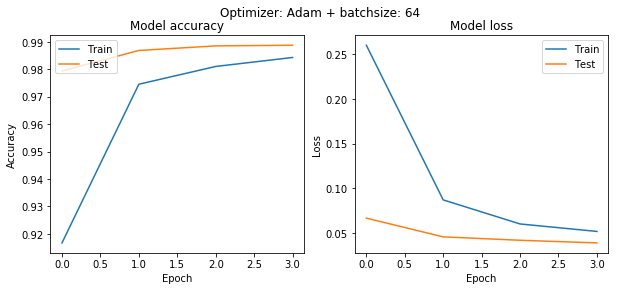

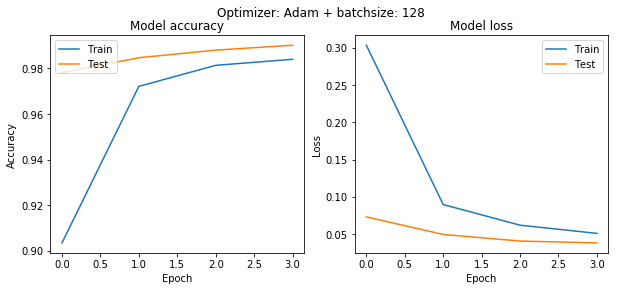

In [121]:
i = 1
for opt, batch, h in zip(['AdaDelta', 'AdaDelta', 'Adam', 'Adam'], ['32', '128', '64', '128'], [hist1, hist2, hist3, hist4]):
    visual_hist(h, opt, batch)
    plt.savefig('CNN_{}'.format(i))
    i = i+1